##  Credit Card Fraud Detection Via Unsupervised Learning
Use unsupervised learning techniques to detect fraud

In [1]:
# Import library and read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  K-means clustering (unlabled data)

In [2]:
df0 = pd.read_csv('data/banksim.csv',header=0)
df0.drop(['Unnamed: 0'], axis=1, inplace=True)
df = pd.read_csv('data/banksim_adj.csv',header=0)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df0.head()

,age,gender,category,amount,fraud
0,3,F,es_transportation,49.71,0
1,4,F,es_health,39.29,0
2,3,F,es_transportation,18.76,0
3,4,M,es_transportation,13.95,0
4,2,M,es_transportation,49.87,0


In [4]:
df.head()

,age,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
0,3,49.71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,4,39.29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,18.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,13.95,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,49.87,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [5]:
df.isnull().sum()

age                      0
amount                   0
fraud                    0
M                        0
es_barsandrestaurants    0
es_contents              0
es_fashion               0
es_food                  0
es_health                0
es_home                  0
es_hotelservices         0
es_hyper                 0
es_leisure               0
es_otherservices         0
es_sportsandtoys         0
es_tech                  0
es_transportation        0
es_travel                0
dtype: int64

### EDA

In [6]:
import seaborn as sns

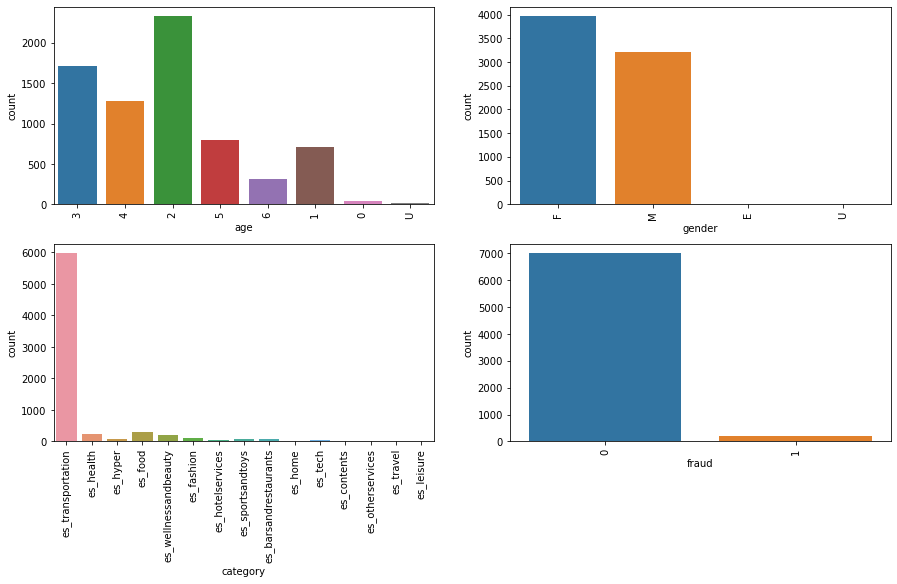

In [7]:
categorical = ['age','gender','category','fraud']
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df0[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [8]:
df0.groupby(['category']).mean()

,amount,fraud
category,,
es_barsandrestaurants,43.841793,0.022472
es_contents,55.170000,0.000000
es_fashion,59.780769,0.020619
es_food,35.216050,0.000000
es_health,126.604704,0.242798
es_home,120.688317,0.208333
es_hotelservices,172.756245,0.548387
es_hyper,46.788180,0.125000
es_leisure,229.757600,1.000000


In [9]:
df.groupby(['age']).mean()

,amount,fraud,M,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel
age,,,,,,,,,,,,,,,,,
0,49.468935,0.050000,0.225000,0.050000,0.000000,0.000000,0.050000,0.075000,0.000000,0.025000,0.025000,0.000000,0.000000,0.050000,0.000000,0.700000,0.000000
1,35.622829,0.026648,0.437588,0.011220,0.001403,0.007013,0.036466,0.029453,0.002805,0.004208,0.012623,0.004208,0.001403,0.016830,0.004208,0.833100,0.004208
2,37.228665,0.028718,0.426489,0.013716,0.002143,0.014145,0.040720,0.036862,0.003000,0.003429,0.010716,0.001286,0.000429,0.010287,0.004286,0.825547,0.002143
3,37.279338,0.023283,0.462165,0.011641,0.003492,0.014552,0.041909,0.030268,0.002328,0.005821,0.009313,0.001164,0.002328,0.006985,0.006985,0.837602,0.002328
4,36.197985,0.035966,0.469898,0.011728,0.000000,0.010946,0.045348,0.032838,0.003127,0.002346,0.013292,0.003909,0.000782,0.011728,0.004691,0.825645,0.003127
5,37.547521,0.023990,0.443182,0.006313,0.001263,0.016414,0.034091,0.036616,0.006313,0.005051,0.012626,0.000000,0.002525,0.010101,0.008838,0.834596,0.002525
6,36.700852,0.022293,0.477707,0.022293,0.000000,0.022293,0.041401,0.031847,0.006369,0.003185,0.006369,0.000000,0.003185,0.009554,0.003185,0.834395,0.000000


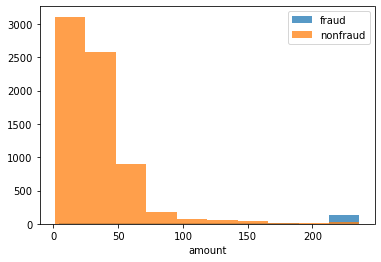

In [10]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = df[df.fraud == 1] 
df_non_fraud = df[df.fraud == 0]
# Plot histograms of the amounts in fraud and non-fraud data 
plt.hist(df_fraud.amount, alpha=0.75, label='fraud')
plt.hist(df_non_fraud.amount, alpha=0.75, label='nonfraud')
plt.xlabel('amount')
plt.legend()
plt.show()



###  Optimze the number of clusters (elbow curve)

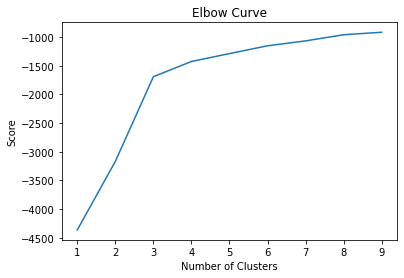

In [11]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import MinMaxScaler
labels = df.fraud
cols = ['age', 'amount', 'M', 'es_barsandrestaurants', 'es_contents',
        'es_fashion', 'es_food', 'es_health', 'es_home', 'es_hotelservices',
        'es_hyper', 'es_leisure', 'es_otherservices', 'es_sportsandtoys',
        'es_tech', 'es_transportation', 'es_travel']
# Take the float values of df for X
X = df[cols].values.astype(np.float)
# Define the scaler and apply to the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# Define the model 
kmeans = MiniBatchKMeans(n_clusters=8, random_state=123)
# Fit the model to the scaled data
kmeans.fit(X_scaled)
# Define the range of clusters to try
clustno = range(1, 10)
# Run MiniBatch Kmeans over the number of clusters
kmeans = [MiniBatchKMeans(n_clusters=i) for i in clustno]
# Obtain the score for each model
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
# Plot the models and their respective score 
plt.plot(clustno, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Train model and predict the fraud

In [12]:
from sklearn.model_selection import train_test_split
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.3, random_state=123)

# Define K-means model 
kmeans = MiniBatchKMeans(n_clusters=3, random_state=123).fit(X_train)

# Obtain predictions and calculate distance from cluster centroid
X_test_clusters = kmeans.predict(X_test)
X_test_clusters_centers = kmeans.cluster_centers_
dist = [np.linalg.norm(x-y) for x, y in zip(X_test, X_test_clusters_centers[X_test_clusters])]

# Create fraud predictions based on outliers on clusters 
km_y_pred = np.array(dist)
km_y_pred[dist >= np.percentile(dist, 93)] = 1
km_y_pred[dist < np.percentile(dist, 93)] = 0

### Measure performance metrics

0.9182999523128279
Confusion matrix, without normalization


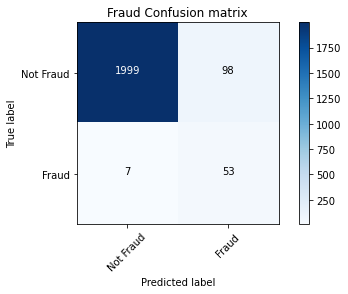

In [13]:
from itertools import product
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

def plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'],
                          normalize=False,
                          title='Fraud Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Obtain the ROC score
print(roc_auc_score(y_test, km_y_pred))

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(confusion_matrix(y_test, km_y_pred))

### DBSCAN 
(Density-Based Spatial Clustering of Applications with Noise)

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, silhouette_score

# Initialize and fit the DBscan model
db = DBSCAN(eps=0.9, min_samples=10, n_jobs=-1).fit(X_scaled)

# Obtain the predicted labels and calculate number of clusters
pred_labels = db.labels_
n_clusters = len(set(pred_labels)) - (1 if -1 in labels else 0)

# Print performance metrics for DBscan
print(f'Estimated number of clusters: {n_clusters}')
print(f'Homogeneity: {homogeneity_score(labels, pred_labels):0.3f}')
print(f'Silhouette Coefficient: {silhouette_score(X_scaled, pred_labels):0.3f}')

Estimated number of clusters: 23
Homogeneity: 0.612
Silhouette Coefficient: 0.713


In [15]:
# Count observations in each cluster number
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

[3252  145 2714   55  174  119  122   98   54   15   76   15   43   25
   51   47   42   15   25   20   19   10]


In [16]:
# Sort the sample counts of the clusters and take the top 3 smallest clusters
smallest_clusters = np.argsort(counts)[:3]
# Print the results 
print(f'The smallest clusters are clusters: {smallest_clusters}')
# Print the counts of the smallest clusters only
print(f'Their counts are: {counts[smallest_clusters]}')

The smallest clusters are clusters: [21 17  9]
Their counts are: [10 15 15]


In [17]:
# Create a dataframe of the predicted cluster numbers and fraud labels 
dfoutput = pd.DataFrame({'clusternr':pred_labels,'fraud':labels})

# Create a condition flagging fraud for the smallest clusters 
dfoutput['predicted_fraud'] = np.where((dfoutput['clusternr'].isin([21, 17, 9])), 1 , 0)

# Run a crosstab on the results 
print(pd.crosstab(dfoutput['fraud'], dfoutput['predicted_fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              6973  16
1               176  24
